In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

wine = load_wine()

In [16]:
X = pd.DataFrame(data = wine.data, columns = wine.feature_names)

In [17]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
y = wine.target

target_names = wine.target_names
target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Plot some features and color the 3 classes

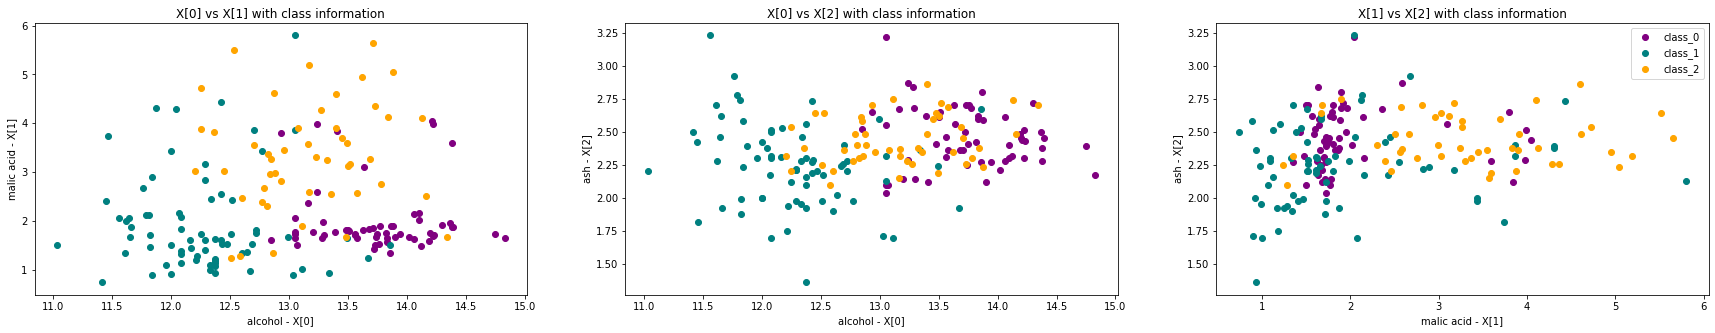

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(30, 5))
x = np.array(X)

for c, i, target_name in zip(['purple', 'teal', 'orange'], [0, 1, 2], target_names):
    ax[0].scatter(x[y==i, 0], x[y==i, 1], c=c, label=target_name)
    ax[0].set_title('X[0] vs X[1] with class information')
    ax[0].set_xlabel('alcohol - X[0]')
    ax[0].set_ylabel('malic acid - X[1]')
    
    ax[1].scatter(x[y==i, 0], x[y==i, 2], c=c, label=target_name)
    ax[1].set_title('X[0] vs X[2] with class information')
    ax[1].set_xlabel('alcohol - X[0]')
    ax[1].set_ylabel('ash - X[2]')    
    
    ax[2].scatter(x[y==i, 1], x[y==i, 2], c=c, label=target_name)
    ax[2].set_title('X[1] vs X[2] with class information')
    ax[2].set_xlabel('malic acid - X[1]')
    ax[2].set_ylabel('ash - X[2]')    

plt.legend();

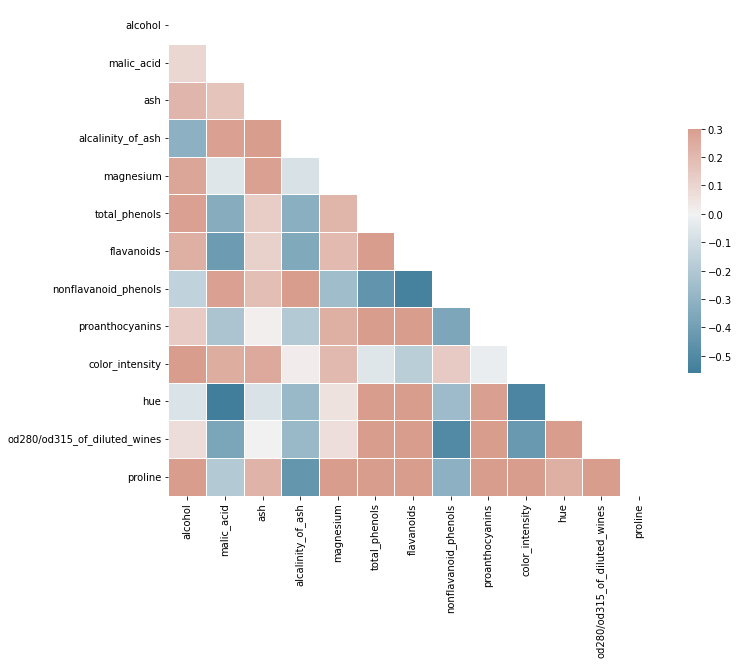

In [46]:
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## LDA

In [29]:
lda = LDA(n_components=2)

In [30]:
x_new = lda.fit_transform(X, y)

In [31]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

In [33]:
x_new = pd.DataFrame(x_new)
x_new.head()

,0,1
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224


## Plot the 2 components produced with LDA

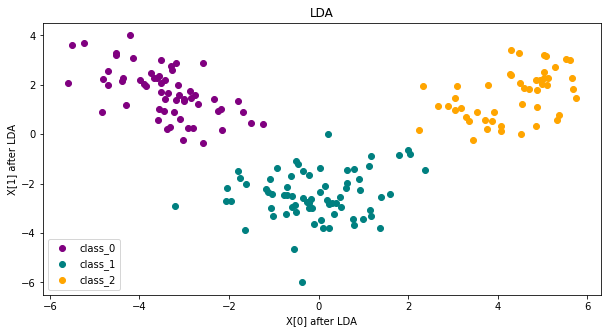

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
x = np.array(x_new)

for c, i, target_name in zip(['purple', 'teal', 'orange'], [0, 1, 2], target_names):
    plt.scatter(x[y==i, 0], x[y==i, 1], c=c, label=target_name)
    
plt.title('LDA')
plt.xlabel('X[0] after LDA')
plt.ylabel('X[1] after LDA')

plt.legend();

In [47]:
x_new.corr()

,0,1
0,1.000000e+00,4.404384e-16
1,4.404384e-16,1.000000e+00
